# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fanalysis.pca import PCA
%matplotlib notebook


## Importing the dataset


In [3]:
#read_csv : est une fonction pour l'importation des données (csv,tsv,txt ...) 
dataset = pd.read_csv('Mall_Customers.csv')
#on éliminue le 'ID'
dataset = dataset.iloc[:,1:]
dataset

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


<h3>Par La suite on va séparer notre données on deux variables une quantitative et l'autre qualitative </h3>


<h4>1. On va stocker les variables quantitative dans la variable DC puis on va la rendre centrée et résuite <h4>

In [4]:
#récuperer les variobLes quantitatives
quantitatives = dataset.iloc[:,1:] 
pd.DataFrame(quantitatives)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [5]:
#LesqueLLes {variables quantitatives) sont centrées et réduites
ZC=(quantitatives.values-np.mean(quantitatives.values,axis=0))/np.std(quantitatives.values,axis=0)
pd.DataFrame(ZC)

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


<h4>2. On va stocker les variables qualitative dans la variable quaLitatives </h4>

Apres le stockage on va codé la variable DD par 0 et 1 

In [6]:
#récuperer les variables quaLitatives
quaLitatives=dataset.iloc[:,:1] 
print(quaLitatives)

#codage 0/1
DDcoding = pd.get_dummies(quaLitatives)
print(DDcoding)

#proportions
p_k = np.mean(DDcoding.values,axis=0)
print(p_k)

#standarisation des indicatrices
ZD = DDcoding.values/np.sqrt(p_k)
print(ZD)

      Genre
0      Male
1      Male
2    Female
3    Female
4    Female
..      ...
195  Female
196  Female
197    Male
198    Male
199    Male

[200 rows x 1 columns]
     Genre_Female  Genre_Male
0               0           1
1               0           1
2               1           0
3               1           0
4               1           0
..            ...         ...
195             1           0
196             1           0
197             0           1
198             0           1
199             0           1

[200 rows x 2 columns]
[0.56 0.44]
[[0.         1.50755672]
 [0.         1.50755672]
 [1.33630621 0.        ]
 [1.33630621 0.        ]
 [1.33630621 0.        ]
 [1.33630621 0.        ]
 [1.33630621 0.        ]
 [1.33630621 0.        ]
 [0.         1.50755672]
 [1.33630621 0.        ]
 [0.         1.50755672]
 [1.33630621 0.        ]
 [1.33630621 0.        ]
 [1.33630621 0.        ]
 [0.         1.50755672]
 [0.         1.50755672]
 [1.33630621 0.        ]
 [0.       

In [7]:
dataset["Genre"].count()

200

In [8]:
#assembter les deux ensembles Z
Z = np.concatenate((ZC, ZD),axis=1)
print(Z)

[[-1.42456879 -1.73899919 -0.43480148  0.          1.50755672]
 [-1.28103541 -1.73899919  1.19570407  0.          1.50755672]
 [-1.3528021  -1.70082976 -1.71591298  1.33630621  0.        ]
 [-1.13750203 -1.70082976  1.04041783  1.33630621  0.        ]
 [-0.56336851 -1.66266033 -0.39597992  1.33630621  0.        ]
 [-1.20926872 -1.66266033  1.00159627  1.33630621  0.        ]
 [-0.27630176 -1.62449091 -1.71591298  1.33630621  0.        ]
 [-1.13750203 -1.62449091  1.70038436  1.33630621  0.        ]
 [ 1.80493225 -1.58632148 -1.83237767  0.          1.50755672]
 [-0.6351352  -1.58632148  0.84631002  1.33630621  0.        ]
 [ 2.02023231 -1.58632148 -1.4053405   0.          1.50755672]
 [-0.27630176 -1.58632148  1.89449216  1.33630621  0.        ]
 [ 1.37433211 -1.54815205 -1.36651894  1.33630621  0.        ]
 [-1.06573534 -1.54815205  1.04041783  1.33630621  0.        ]
 [-0.13276838 -1.54815205 -1.44416206  0.          1.50755672]
 [-1.20926872 -1.54815205  1.11806095  0.          1.50

<h4> Donc On a la matrice Z qui est centrées réduites, alors on peut appliqué l'ACP </h4>

<h4>On va aplliqué la classe ACP sur notre données et par la suite on va calculer les valeurs propres</h4>

<h4>Les valeurs propres d'un axe nous permettent de determiner la quantité d'information contenue sur chaque axe principal.</h4>

In [9]:
#instanciation - Les  données sont deja standarisées
afdm = PCA(std_unit=False,row_labels=dataset.index,col_labels=[quantitatives.columns,DDcoding.columns])
#Lancement des coLcuLs
afdm.fit(Z)

#affichage des vaLeurs propres
print(afdm.eig_[0])

[1.34760182e+00 1.04922579e+00 9.30425544e-01 6.72746848e-01
 1.13714832e-32]


In [10]:
pd.DataFrame(afdm.eig_)
sum(afdm.eig_[1])

100.0

A l’ aide de l’affichage des valeurs propres et leurs cumulées on peut déterminer le nombre de composantes principales que l’on doit retenir.

<IPython.core.display.Javascript object>


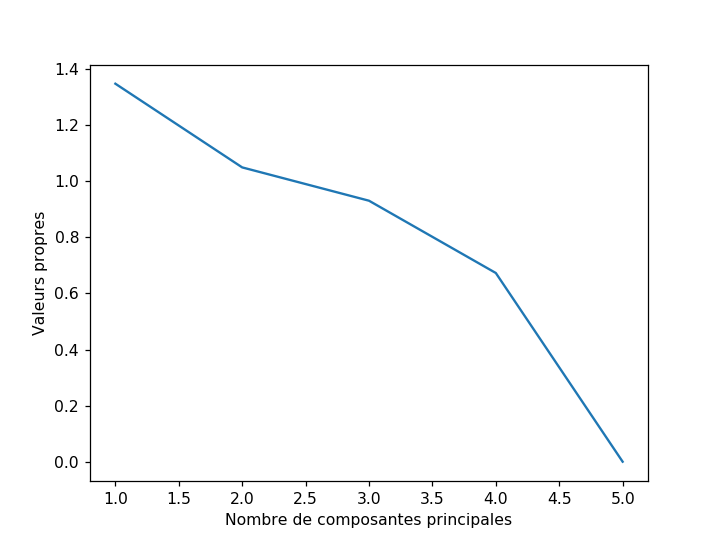

Text(0.5, 0, 'Nombre de composantes principales')

In [11]:
fig1 = plt.figure("l’éboulis des valeurs propres")
ax1 = fig1.add_subplot()
ax1.plot(np.arange(1,6), afdm.eig_[0])
ax1.set_ylabel("Valeurs propres")
ax1.set_xlabel("Nombre de composantes principales")

<h4>Pour determiner le nombre de dimensions à retenir, il faut d'abord calculer l'inertie totale contenue dans nos données.
pour calculer l'inertie totale de nos données, il suffit de calculer la somme des valeurs propres. </h4>

[ 33.69004557  59.9206902   83.18132879 100.         100.        ]


<IPython.core.display.Javascript object>


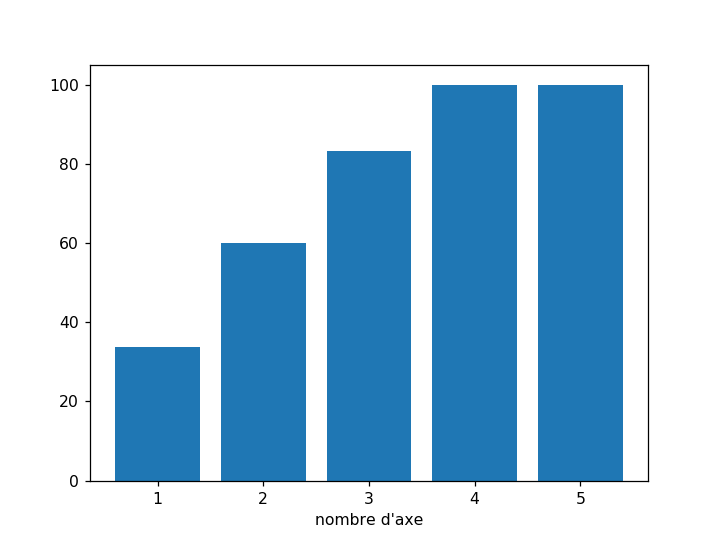

Text(0.5, 0, "nombre d'axe")

In [12]:
print(afdm.eig_[2])

#cumul de l'information expliquée
fig2 = plt.figure("taux d'information obtenu par chaque axe")
ax2 = fig2.add_subplot()

ax2.bar(np.arange(1,6),afdm.eig_[2])
ax2.set_xlabel("nombre d'axe")

D'après le graphe ci-dessus, le premier axe retient 34% de l’inertie totale quant à l’axe 2 retient 26% de l’inertie, alors que l’axe 3 retient 23% de l’inertie. donc les 3 premiers axes retiennent à un taux d’inertie expliquée de 83%. il est donc suffisant de retenir les 3 premiers axes. c'est à dire, on peut passer d'un espace de 5 dimensions à un espace de 3 dimensions tout en conservant 83% de l'inertie totale.

<h2>La représentation des individus dans l’espace des 3 axes principaux d’inertie.</h2>

In [13]:
pd.DataFrame(afdm.row_coord_)

,0,1,2,3,4
0,-0.406383,-0.520714,2.072527,1.335529,4.868785e-17
1,-1.427673,-0.367310,2.277644,0.082329,6.054009e-18
2,0.050761,-1.894068,0.367375,2.174381,5.241769e-18
3,-1.694513,-1.631908,0.717467,0.075228,2.128374e-16
4,-0.313108,-1.810483,0.426460,0.683070,-4.818928e-18
...,...,...,...,...,...
195,-1.179572,1.324568,-1.932441,-0.615899,6.824835e-17
196,0.672751,1.221061,-2.438084,0.272925,1.332929e-16
197,-0.723719,2.765010,-0.583178,-0.313022,3.861464e-17
198,0.767096,2.861930,-1.150341,1.219621,1.580900e-16


In [14]:
pd.DataFrame(afdm.row_coord_).std()

0    1.163776e+00
1    1.026888e+00
2    9.670062e-01
3    8.222697e-01
4    6.344443e-17
dtype: float64

In [15]:
#coordonnées des individus
F = afdm.row_coord_[:,:3]
pd.DataFrame(pd.DataFrame(F,columns=['F1','F2', 'F3']))

,F1,F2,F3
0,-0.406383,-0.520714,2.072527
1,-1.427673,-0.367310,2.277644
2,0.050761,-1.894068,0.367375
3,-1.694513,-1.631908,0.717467
4,-0.313108,-1.810483,0.426460
...,...,...,...
195,-1.179572,1.324568,-1.932441
196,0.672751,1.221061,-2.438084
197,-0.723719,2.765010,-0.583178
198,0.767096,2.861930,-1.150341


<IPython.core.display.Javascript object>


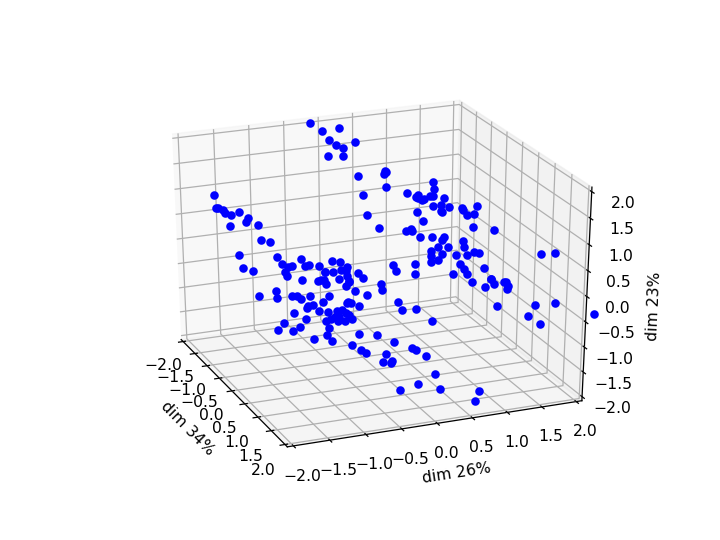

Text(0.5, 0, 'dim 23%')

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for i in range(dataset.shape[0]):
for i in range(len(F)):
    ax.scatter(F[i,0], F[i,1], F[i,2], c = 'b', marker='o')


ax.set_xlabel('dim 34%')
ax.set_ylabel('dim 26%')
ax.set_zlabel('dim 23%')
##########################################################

<IPython.core.display.Javascript object>


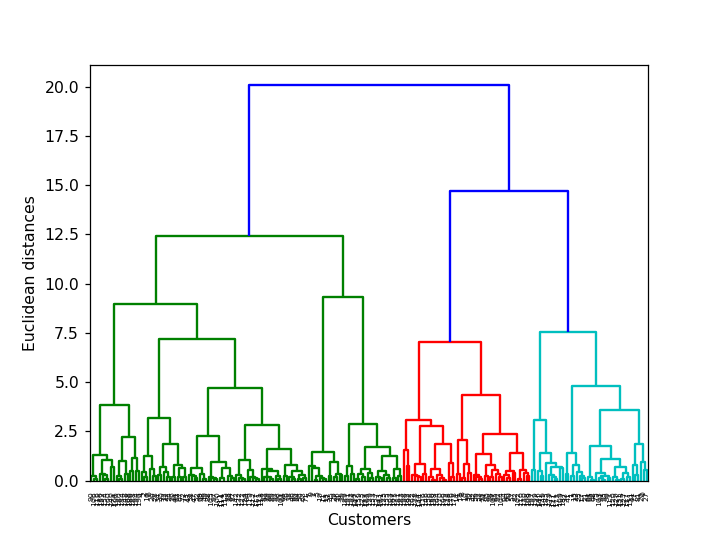

Text(0, 0.5, 'Euclidean distances')

In [17]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
fig3 = plt.figure("Dendrogram")
ax3 = fig3.add_subplot()

dendrogram = sch.dendrogram(sch.linkage(F, method = 'ward'))

ax3.set_xlabel('Customers')
ax3.set_ylabel('Euclidean distances')

In [18]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(F)

In [19]:
pd.DataFrame(y_hc)

,0
0,0
1,0
2,1
3,1
4,1
...,...
195,1
196,1
197,0
198,0


<IPython.core.display.Javascript object>


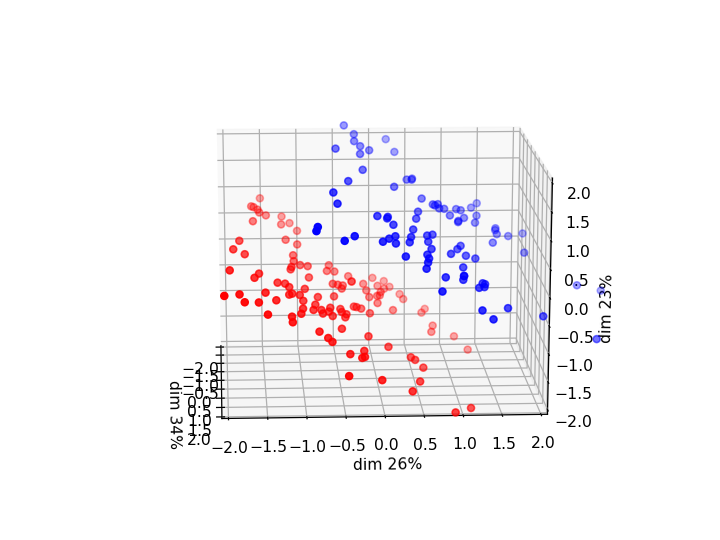

Text(0.5, 0, 'dim 23%')

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig4 = plt.figure("Visualisation des groupes")
ax4 = fig4.add_subplot(111, projection='3d')

ax4.set_xlim(-2,2)
ax4.set_ylim(-2,2)
ax4.set_zlim(-2,2)

ax4.scatter(F[y_hc == 0,0], F[y_hc == 0,1], F[y_hc == 0,2], c = 'b', marker='o')
ax4.scatter(F[y_hc == 1,0], F[y_hc == 1,1], F[y_hc == 1,2], c = 'r', marker='o')



ax4.set_xlabel('dim 34%')
ax4.set_ylabel('dim 26%')
ax4.set_zlabel('dim 23%')

# Merci pour votre attention